# Imports

In [ ]:
# Basic imports
import pandas as pd
import numpy as np
import datetime
from collections import Counter

In [ ]:
# NLP Imports
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams, bigrams, trigrams
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
import re

In [ ]:
# Import seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Import Dataset
[60k Stack Overflow Questions with Quality Rating](https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate)

In [ ]:
# Reads Data From File
#data = pd.read_csv('/content/drive/My Drive/Cap 5768 Data Science Team-20201011T161617Z-001/Cap 5768 Data Science Team/Code/data.csv')
data = pd.read_csv('data/stackOverflowData.csv')
data = data.dropna()
data

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,1/1/2016 0:21,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,1/1/2016 1:44,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,1/1/2016 2:03,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,1/1/2016 2:48,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,1/1/2016 3:30,HQ
...,...,...,...,...,...,...
60192,60467932,C++ The correct way to multiply an integer and...,<p>I try to multiply an integer by a double bu...,<c++>,2/29/2020 17:46,LQ_CLOSE
60193,60468018,How can I make a c# application outside of vis...,<p>I'm very new to programming and I'm teachin...,<c#><visual-studio>,2/29/2020 17:55,LQ_CLOSE
60194,60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,*URLS.PY*\r\n //URLS.PY FILE\r\n fro...,<django><django-views><django-templates>,2/29/2020 18:35,LQ_EDIT
60195,60469392,PHP - getting the content of php page,<p>I have a controller inside which a server i...,<javascript><php><html>,2/29/2020 20:32,LQ_CLOSE


In [ ]:
# Checks distribution of Qualities, as we can see the distributions are equal throughout each category
quality_counts=data.groupby(['Y']).size()
print(quality_counts)

Y
HQ          20000
LQ_CLOSE    19999
LQ_EDIT     19998
dtype: int64


# Finding Relations

## Quality by Creation Date

### Quality by Creation Month-Year

In [ ]:
# Checking data type of date column
type(data.iloc[0].CreationDate)

str

In [ ]:
# Testing how to reformat CreationDate to yyyy-mm
#strptime parses a string into a datetime object given a corresponding format
#strftime converts object to a string corresponding to a format
date = datetime.datetime.strptime(data.iloc[0].CreationDate, "%Y/%m/%d %H:%M")
print(date)
date.strftime('%Y-%m')

2016-01-01 00:21:00


'2016-01'

In [ ]:
# Creating new dataframe with only Creation Date and Quality, then reformating it so that it is in yyyy-mm format
quality_by_date = data[['CreationDate','Y']]
quality_by_date.head()

,CreationDate,Y
0,1/1/2016 0:21,LQ_CLOSE
1,1/1/2016 1:44,LQ_EDIT
2,1/1/2016 2:03,HQ
3,1/1/2016 2:48,HQ
4,1/1/2016 3:30,HQ


In [ ]:
# Gets rid of SettingWithCopyWarning that has no negative affect on result
pd.options.mode.chained_assignment = None  # default='warn'

quality_by_date['CreationDate'] = pd.to_datetime(quality_by_date['CreationDate'], errors='coerce', format="%Y/%m/%d %H:%M")
quality_by_date.head()

,CreationDate,Y
0,2016-01-01 00:21:00,LQ_CLOSE
1,2016-01-01 01:44:00,LQ_EDIT
2,2016-01-01 02:03:00,HQ
3,2016-01-01 02:48:00,HQ
4,2016-01-01 03:30:00,HQ


In [ ]:
quality_by_date['CreationDate'] = quality_by_date['CreationDate'].dt.strftime('%Y-%m')
quality_by_date.head(5000)

,CreationDate,Y
0,2016-01,LQ_CLOSE
1,2016-01,LQ_EDIT
2,2016-01,HQ
3,2016-01,HQ
4,2016-01,HQ
...,...,...
4995,2016-03,LQ_CLOSE
4996,2016-03,HQ
4997,2016-03,HQ
4998,2016-03,LQ_EDIT


In [ ]:
# Creating a Pivot Table grouping the posts by CreationDate and Quality
quality_by_date_pivot = pd.pivot_table(quality_by_date, index=['CreationDate'], columns=['Y'], aggfunc=np.size, fill_value=0)
quality_by_date_pivot.head()

Y,HQ,LQ_CLOSE,LQ_EDIT
CreationDate,,,
2016-01,1628,1174,1052
2016-02,1772,1208,996
2016-03,1578,1346,932
2016-04,282,1276,910
2016-05,1432,1100,866


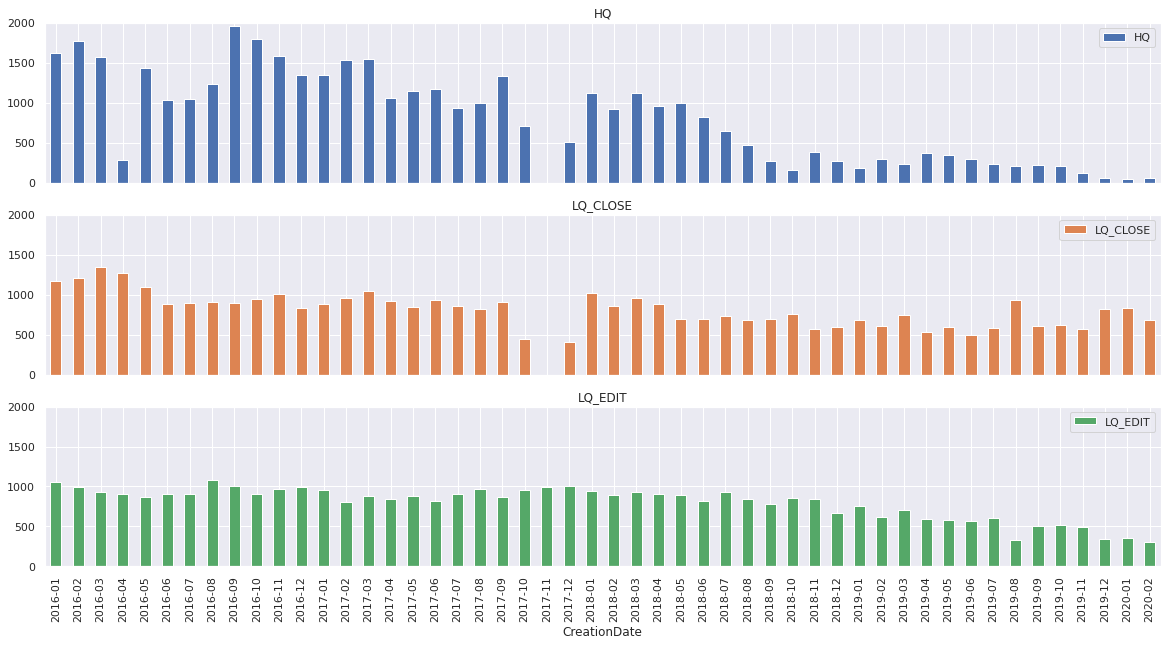

In [ ]:
# Graph values of HQ, LQ_EDIT, LQ_CLOSE by month
quality_by_date_pivot.plot(kind= 'bar', figsize=(20,10), sharex = True, subplots = True, ylim = (0,2000))
plt.show()

The graphs show that there is a high concentration of HQ questions further back in time, this could be due to the method of determing what is considered a HQ question being based on just the number of upvotes the question received. Categorizing it this way means that there is an innate bias towards older questions as they have more time to recieve those upvotes.

Possible future solutions for this problem could be to consider a question to be HQ if it passed a certain threshold of votes within the first month rather than within its whole lifetime.

As you can further see, the amount LQ questions are relativelty constant throughout the timeline.

Overall, due to the way the data was collected, I do not believe the CreationDate should be considered in our predictions as it is too biased.

### Quality by Creation Hour

Acknowledging that there is a bias from simply using the Creation Date's Month as a possible feature in our predictions, we are moving on to see if there is a relationship with just the Creation Date's Hour of the day. This could help us see if there is a specific hour of the day that correlates with HQ questions.

In [ ]:
# Creating new dataframe with only Creation Date and Quality, then reformating it so that it is in HH format
quality_by_hour = data[['CreationDate','Y']]
quality_by_hour.head()

,CreationDate,Y
0,1/1/2016 0:21,LQ_CLOSE
1,1/1/2016 1:44,LQ_EDIT
2,1/1/2016 2:03,HQ
3,1/1/2016 2:48,HQ
4,1/1/2016 3:30,HQ


In [ ]:
quality_by_hour['CreationDate'] = pd.to_datetime(quality_by_hour['CreationDate'], errors='coerce', format="%m/%d/%Y %H:%M")
quality_by_hour.head()

,CreationDate,Y
0,2016-01-01 00:21:00,LQ_CLOSE
1,2016-01-01 01:44:00,LQ_EDIT
2,2016-01-01 02:03:00,HQ
3,2016-01-01 02:48:00,HQ
4,2016-01-01 03:30:00,HQ


In [ ]:
# Renaming Columns to Hour and Count
quality_by_hour = quality_by_hour.rename(columns={"CreationDate": "Hour", "Y": "Quality"})
quality_by_hour.head()

,Hour,Quality
0,2016-01-01 00:21:00,LQ_CLOSE
1,2016-01-01 01:44:00,LQ_EDIT
2,2016-01-01 02:03:00,HQ
3,2016-01-01 02:48:00,HQ
4,2016-01-01 03:30:00,HQ


In [ ]:
# Reformating to %H format
quality_by_hour['Hour'] = quality_by_hour['Hour'].dt.strftime('%H')
quality_by_hour.head(5000)

,Hour,Quality
0,00,LQ_CLOSE
1,01,LQ_EDIT
2,02,HQ
3,02,HQ
4,03,HQ
...,...,...
4995,13,LQ_CLOSE
4996,13,HQ
4997,14,HQ
4998,14,LQ_EDIT


In [ ]:
# Creating a Pivot Table grouping the posts by Hour and Quality
quality_by_hour_pivot = pd.pivot_table(quality_by_hour, index=['Hour'], columns=['Quality'], aggfunc=np.size, fill_value=0)
quality_by_hour_pivot.head(24)

Quality,HQ,LQ_CLOSE,LQ_EDIT
Hour,,,
00,930,886,760
01,856,870,730
02,950,878,858
03,874,970,900
04,982,952,1160
05,1104,1170,1426
06,1230,1548,1856
07,1634,1706,2142
08,1820,1638,2110


<Figure size 432x288 with 0 Axes>

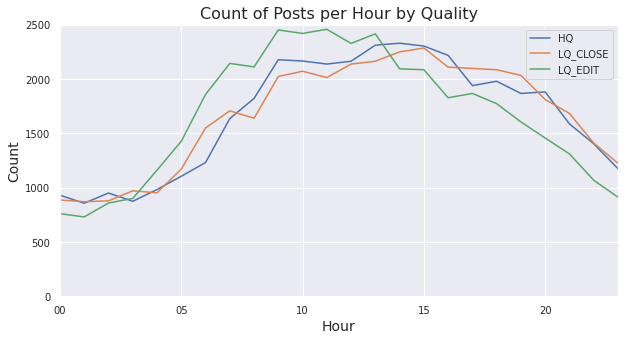

In [ ]:
# Plotting the counts of the 3 Quality columns on a line graph
plt.figure()
ax = quality_by_hour_pivot.plot(kind= 'line', figsize=(10,5), ylim = (0,2500), xlim = (00,23))
ax.legend(loc=1,fontsize=10);
ax.set_title('Count of Posts per Hour by Quality',fontdict={'fontsize':16})
ax.set_ylabel('Count',fontdict={'fontsize':14})
ax.set_xlabel('Hour',fontdict={'fontsize':14})
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
plt.show()

In [ ]:
# Redisplaying the Qualities as a ratio to HQ questions so that we can see when
# there are more HQ questions than LQ_EDIT and LQ_CLOSE
quality_by_hour_ratios = quality_by_hour_pivot.copy()
quality_by_hour_ratios['HQ/LQ_EDIT'] = quality_by_hour_ratios['HQ']/quality_by_hour_ratios['LQ_EDIT']
quality_by_hour_ratios['HQ/LQ_CLOSE'] = quality_by_hour_ratios['HQ']/quality_by_hour_ratios['LQ_CLOSE']
quality_by_hour_ratios = quality_by_hour_ratios.drop('LQ_CLOSE',axis=1)
quality_by_hour_ratios = quality_by_hour_ratios.drop('LQ_EDIT',axis=1)
quality_by_hour_ratios = quality_by_hour_ratios.drop('HQ',axis=1)

quality_by_hour_ratios.head(24)

Quality,HQ/LQ_EDIT,HQ/LQ_CLOSE
Hour,,
00,1.223684,1.049661
01,1.172603,0.983908
02,1.107226,1.082005
03,0.971111,0.901031
04,0.846552,1.031513
05,0.774194,0.943590
06,0.662716,0.794574
07,0.762838,0.957796
08,0.862559,1.111111


<Figure size 432x288 with 0 Axes>

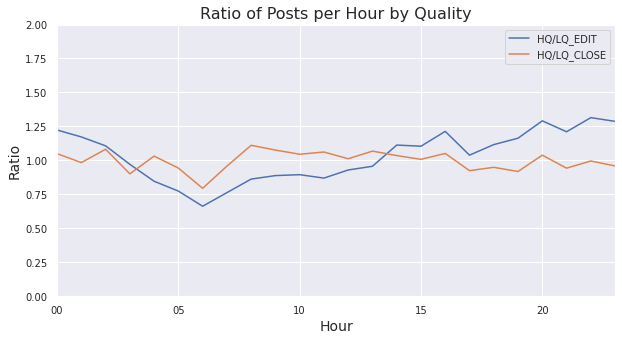

In [ ]:
# Plotting the Ratios of HQ tp LQ_EDIT and HQ to LQ_CLOSE columns on a line graph
plt.figure()
ax = quality_by_hour_ratios.plot(kind= 'line', figsize=(10,5), ylim = (0,2), xlim = (00,23))
ax.legend(loc=1,fontsize=10);
ax.set_title('Ratio of Posts per Hour by Quality',fontdict={'fontsize':16})
ax.set_ylabel('Ratio',fontdict={'fontsize':14})
ax.set_xlabel('Hour',fontdict={'fontsize':14})
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
plt.show()

As you can see, there is one general peak where the amount of HQ is approx. equal to or greater than both the LQ_EDIT and LQ_CLOSE. This is during the time period of 13:00-2:00, which is 1:00 PM to 2:00 AM. 

A possible causation of this could be that those times are when more people, either seeking help or have the knowledge to answer, are online and on the website. Thus, there is a greater chance of visibility and therefore your question has a better chance of getting upvotes and getting answers.

The time period outside of this peak is a time where most people are:
1) Sleeping
2) Working
3) In shcool

As you can see that could be a reason why the ratio is lower during that time
and why the overall counts of questions is lower as well.

## Quality By Tag


Next, we are looking at the tags and seeing if there any meaningful relationships between a specific tag and whether the question is HQ or not. This could show us if there are any specific subjects that stand out as HQ questions or if maybe some tags are too broad and will be better if narrowed down.

In [ ]:
# Created new dataframe with only the tags and respective qualities
tag_quality = data[['Tags','Y']]
tag_quality["Tags"] = tag_quality["Tags"].str.lower()
tag_quality.head()

,Tags,Y
0,<java><repeat>,LQ_CLOSE
1,<sql><sql-server>,LQ_EDIT
2,<java><optional>,HQ
3,<javascript><image><overlay><react-native><opa...,HQ
4,<swift><operators><whitespace><ternary-operato...,HQ


In [ ]:
# Checking the type of the Tags column
print(type(tag_quality.iloc[0].Tags))

<class 'str'>


In [ ]:
# Goes through every row of dataframe and takes a count of the number of times
# each tag has occured and what quality they were associated with, saving the
# data in a dictionary with the (Tag, Quality) as the key and count as value
tags_dict = {}

for index, row in tag_quality.iterrows():
  if len(row['Tags']) != 0:
    tags = row['Tags'][1:-1].split("><")
    quality = row['Y']
  for tag in tags:
    if (tag,quality) in tags_dict:
      tags_dict[tag,quality] += 1
    else:
      tags_dict[tag,quality] = 1

print(len(tags_dict))

16661


In [ ]:
# In order to get rid of tags that occur an insignificant amount of times
# we set a threshold of the minimum number of occurances and filter the tags so
# that at least one quality column associated with the tag has occured over
# the threshold
tag_threshold = 100
tags_dict_above_threshold = {k:v for k,v in tags_dict.items() if ((k[0], 'HQ') in tags_dict and tags_dict[k[0], 'HQ'] >= tag_threshold) or
                                                                 ((k[0], 'LQ_EDIT') in tags_dict and tags_dict[k[0], 'LQ_EDIT'] >= tag_threshold) or
                                                                 ((k[0], 'LQ_CLOSE') in tags_dict and tags_dict[k[0], 'LQ_CLOSE'] >= tag_threshold)}

In [ ]:
len(tags_dict_above_threshold)

363

In [ ]:
# In order to ensure that every tag in the dictionary with at least one quality
# over the threshold has values for every qualitiy associated with it, 
# we are going through the original dictionary and creating a new key with a 
# value of 0 for any missing Tag,Quality pairs

# Example: If the tag 'Java' 500 HQ values, 300 LQ_EDIT values, but no LQ_CLOSE
# values, we will create a new key <'Java','LQ_CLOSE> = 0

tags_dict_above_threshold_NA_filled_with_zeros = {}

for k,v in tags_dict_above_threshold.items():
  if k not in tags_dict_above_threshold_NA_filled_with_zeros:
    tags_dict_above_threshold_NA_filled_with_zeros[k[0],'HQ'] = 1
    tags_dict_above_threshold_NA_filled_with_zeros[k[0],'LQ_EDIT'] = 1
    tags_dict_above_threshold_NA_filled_with_zeros[k[0],'LQ_CLOSE'] = 1
  tags_dict_above_threshold_NA_filled_with_zeros[k] = v

In [ ]:
len(tags_dict_above_threshold_NA_filled_with_zeros)

363

In [ ]:
# Create a pivot table with Columns for the count HQ, LQ_CLOSE, LQ_EDIT
tag_df_above_threshold = pd.Series(tags_dict_above_threshold_NA_filled_with_zeros).reset_index()
tag_df_above_threshold.columns = ['Tags','Quality','Count']
tag_df_above_threshold_pivot = pd.pivot_table(tag_df_above_threshold, index=['Tags'], columns=['Quality'], aggfunc=np.sum, fill_value=0)
tag_df_above_threshold_pivot

Count                 
Quality                HQ LQ_CLOSE LQ_EDIT
Tags                                      
.net                  196      217     154
.net-core             178       14       7
ajax                   36      138     128
algorithm              32      184     162
amazon-web-services   336       40      51
...                   ...      ...     ...
winforms                5       79     150
wordpress              26      160     160
wpf                    26      112      60
xcode                 302       88      80
xml                    49      100     126

[121 rows x 3 columns]

In [ ]:
# Get the top 10 Tags in every quality category
hq_top_10_tags = tag_df_above_threshold_pivot.sort_values(('Count', 'HQ'), ascending=False).head(10)
lqe_top_10_tags = tag_df_above_threshold_pivot.sort_values(('Count', 'LQ_EDIT'), ascending=False).head(10)
lqc_top_10_tags = tag_df_above_threshold_pivot.sort_values(('Count', 'LQ_CLOSE'), ascending=False).head(10)

Text(0, 0.5, 'Count')

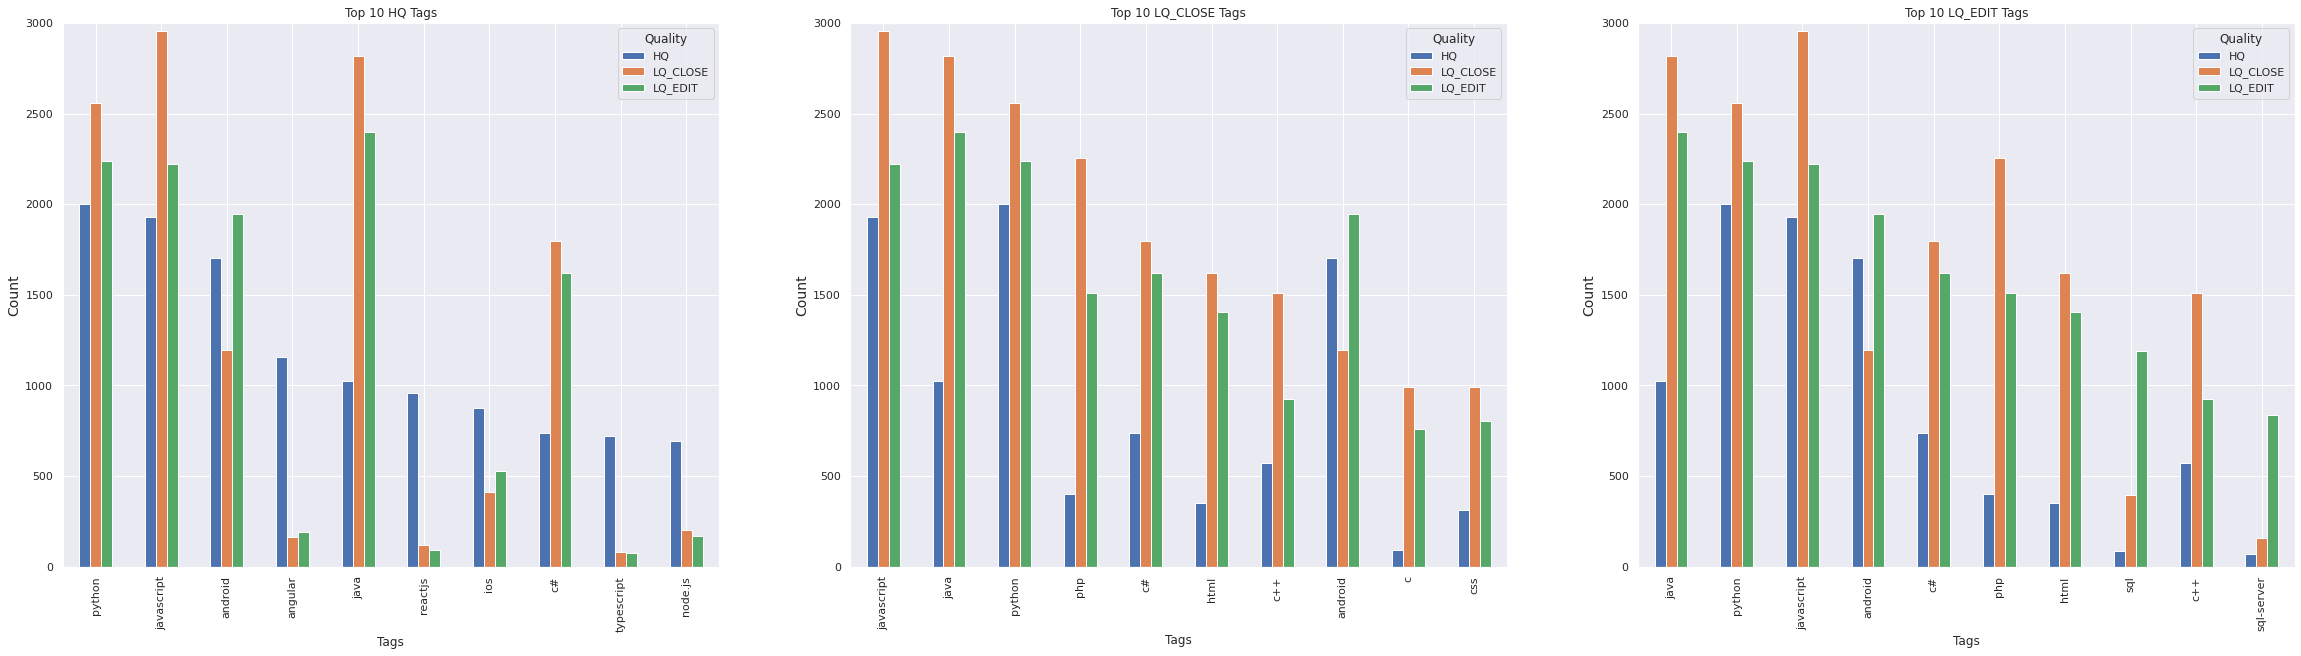

In [ ]:
# Plot the top 10 tag counts for every Quality
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (40,10))
hq_top_10_tags.plot(kind= 'bar', ylim = (0,3000), ax=axes[0], title = 'Top 10 HQ Tags', y='Count')
lqc_top_10_tags.plot(kind= 'bar', ylim = (0,3000), ax=axes[1], title = 'Top 10 LQ_CLOSE Tags', y='Count')
lqe_top_10_tags.plot(kind= 'bar', ylim = (0,3000), ax=axes[2], title = 'Top 10 LQ_EDIT Tags', y='Count')
axes[0].set_ylabel('Count',fontdict={'fontsize':14})
axes[1].set_ylabel('Count',fontdict={'fontsize':14})
axes[2].set_ylabel('Count',fontdict={'fontsize':14})

The raw count does not prove to be that useful as python is a top value for every quality level showing that it has no real affect on the quality. This shows thats popular tags don't distinguish a question enough to judge a questions quality alone. So we will now look at the ratios of HQ to LQ now to see if less popular but more specific tags correlate with HQ questions.

In [ ]:
# Finds ratios of HQ to LQ_CLOSE and HQ to LQ_EDIT
tag_ratios = tag_df_above_threshold_pivot.copy()
tag_ratios['Count', 'HQ/LQ_CLOSE'] = tag_ratios['Count', 'LQ_CLOSE']/tag_ratios['Count', 'HQ']
tag_ratios['Count', 'HQ/LQ_EDIT'] = tag_ratios['Count', 'LQ_EDIT']/tag_ratios['Count', 'HQ']
tag_ratios = tag_ratios.drop(('Count', 'HQ'),axis=1)
tag_ratios = tag_ratios.drop(('Count', 'LQ_CLOSE'),axis=1)
tag_ratios = tag_ratios.drop(('Count', 'LQ_EDIT'),axis=1)

In [ ]:
tag_ratios

Count           
Quality             HQ/LQ_CLOSE HQ/LQ_EDIT
Tags                                      
.net                   1.107143   0.785714
.net-core              0.078652   0.039326
ajax                   3.833333   3.555556
algorithm              5.750000   5.062500
amazon-web-services    0.119048   0.151786
...                         ...        ...
winforms              15.800000  30.000000
wordpress              6.153846   6.153846
wpf                    4.307692   2.307692
xcode                  0.291391   0.264901
xml                    2.040816   2.571429

[121 rows x 2 columns]

In [ ]:
# Makes a copy of the top 10 and bottom 10 Ratios for both LQ_CLOSE and LQ_EDIT
lqe_top_10_tags_ratio = tag_ratios.sort_values(('Count', 'HQ/LQ_EDIT'), ascending=False).head(10)
lqc_top_10_tags_ratio = tag_ratios.sort_values(('Count', 'HQ/LQ_CLOSE'), ascending=False).head(10)
lqe_bot_10_tags_ratio = tag_ratios.sort_values(('Count', 'HQ/LQ_EDIT'), ascending=True).head(10)
lqc_bot_10_tags_ratio = tag_ratios.sort_values(('Count', 'HQ/LQ_CLOSE'), ascending=True).head(10)

<AxesSubplot:title={'center':'Bottom 10 HQ/LQC Tags'}, xlabel='Tags'>

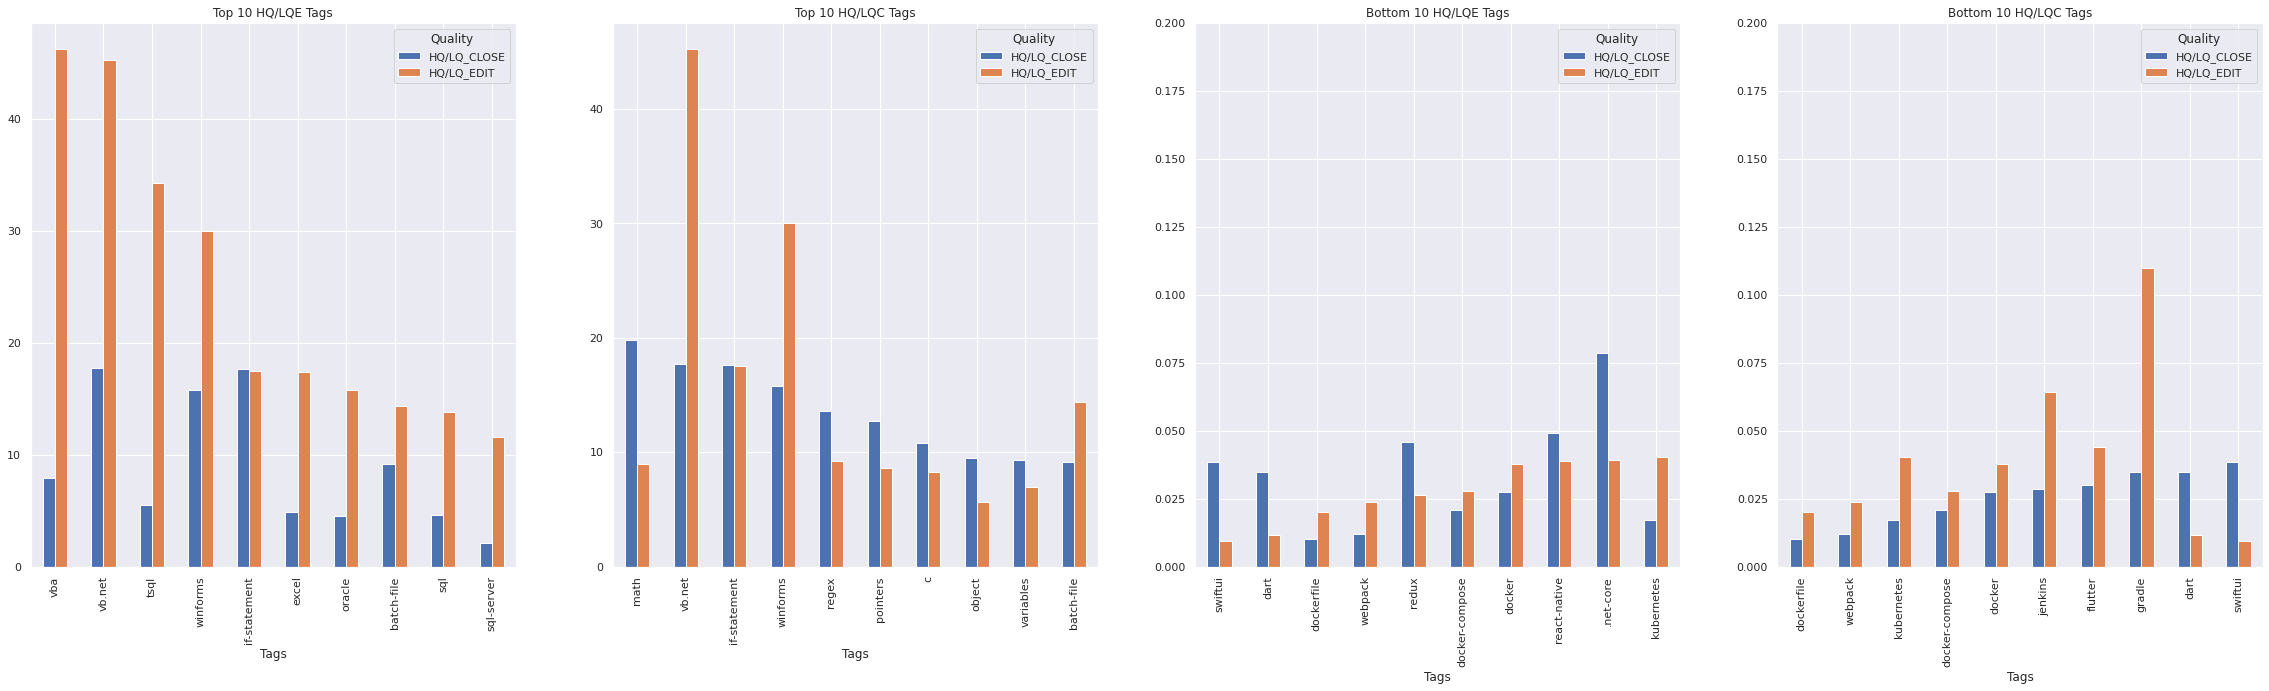

In [ ]:
# Plot the top and bottom ratios of LQ_EDIT and LQ_CLOSE
fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (40,10))
lqe_top_10_tags_ratio.plot(kind= 'bar', ax=axes[0], title = 'Top 10 HQ/LQE Tags', y='Count')
lqc_top_10_tags_ratio.plot(kind= 'bar', ax=axes[1], title = 'Top 10 HQ/LQC Tags', y='Count')
lqe_bot_10_tags_ratio.plot(kind= 'bar', ylim = (0,.2), ax=axes[2], title = 'Bottom 10 HQ/LQE Tags', y='Count')
lqc_bot_10_tags_ratio.plot(kind= 'bar', ylim = (0,.2), ax=axes[3], title = 'Bottom 10 HQ/LQC Tags', y='Count')

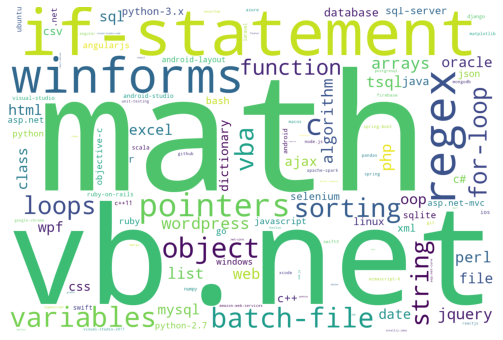

In [ ]:
# Word clouds for HQ/LQ_CLOSE
wc_HQ_LQC = WordCloud(background_color='white',
                      width=1500,
                      height=1000
                      ).generate_from_frequencies(tag_ratios['Count', 'HQ/LQ_CLOSE'])
plt.figure(figsize=(9,6))
plt.imshow(wc_HQ_LQC)
plt.axis('off')
plt.show()

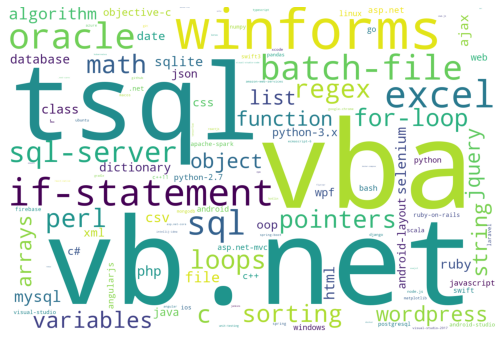

In [ ]:
# Word clouds for HQ/LQ_EDIT
wc_HQ_LQE = WordCloud(background_color='white',
                      width=1500,
                      height=1000
                      ).generate_from_frequencies(tag_ratios['Count', 'HQ/LQ_EDIT'])


# use .generate(space_separated_string) - to generate cloud from text
plt.figure(figsize=(9,6))
plt.imshow(wc_HQ_LQE)
plt.axis('off')
plt.show()

As you can see, there are some clearly significant tags where a massive amount more HQ than LQ questions, all of these in the first two graphs show at least 10 HQ questions per LQ question. Quickly analyzing the results show that although there are some more specifc tags, there are still many broad subjects, thus it cannot be said for certain if narrowing down tags to specific subjects improve the question quality. Also another thing to note that the high ratios could be misleading due to the sample possibly not accurately representing the dataset.

## Quality By Title

### Quality by Title Dataset Creation

In [ ]:
#create dataset of title and quality
quality_by_title = data[['Title','Y']]
quality_by_title.head()

,Title,Y
0,Java: Repeat Task Every Random Seconds,LQ_CLOSE
1,How to get all the child records from differen...,LQ_EDIT
2,Why are Java Optionals immutable?,HQ
3,Text Overlay Image with Darkened Opacity React...,HQ
4,Why ternary operator in swift is so picky?,HQ


### Import Stop words


In [ ]:
#import stopwords
# Reads Data From File
stopwords_path = 'data/stopwords.txt'

stop_words = []

with open(stopwords_path, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  
print(stop_words)

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

### Preprocess function

*   converts to lowercase and splits words
*   cleans words using stemmer

In [ ]:
def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [ ]:
quality_by_title['preprocess'] = quality_by_title['Title'].apply(preprocess)
quality_by_title.head()

,Title,Y,preprocess
0,Java: Repeat Task Every Random Seconds,LQ_CLOSE,java repeat task random second
1,How to get all the child records from differen...,LQ_EDIT,child record tabl base parent id sql server
2,Why are Java Optionals immutable?,HQ,java option immut
3,Text Overlay Image with Darkened Opacity React...,HQ,text overlay imag darken opac react nativ
4,Why ternary operator in swift is so picky?,HQ,ternari oper swift picki


### Most Common Words

In [ ]:
#Get Most Common Words
Counter(" ".join(quality_by_title["preprocess"]).split()).most_common(10)

[('python', 3409),
 ('error', 3337),
 ('file', 3259),
 ('string', 3153),
 ('array', 2949),
 ('android', 2605),
 ('code', 2593),
 ('java', 2579),
 ('function', 2521),
 ('data', 2068)]

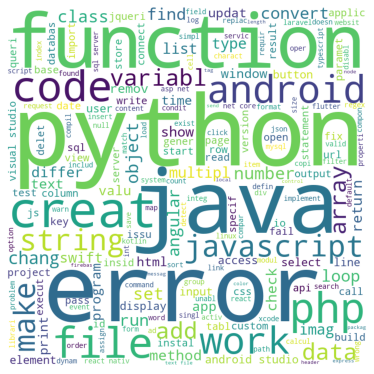

In [ ]:
#Create word cloud (pretty but not necessary)
all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in quality_by_title["preprocess"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Word Pair Occurances (n-grams)

In [ ]:
#showing word pairs and their occurances
n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))

n_gram
for i in n_gram_dic:
    if n_gram_dic[i] >= 200:
        print(i, n_gram_dic[i])

('sql', 'server') 350
('react', 'nativ') 363
('syntax', 'error') 205
('android', 'studio') 595
('visual', 'studio') 421
('asp', 'net') 353
('text', 'file') 223
('net', 'core') 307


### Convert Quality from String to Int

In [ ]:
qual_by_title = quality_by_title[['Title', 'preprocess','Y']].copy()
qual_by_title['Y'] = qual_by_title['Y'].map({'LQ_CLOSE':0, 'LQ_EDIT': 1, 'HQ':2})
qual_by_title.head()

,Title,preprocess,Y
0,Java: Repeat Task Every Random Seconds,java repeat task random second,0
1,How to get all the child records from differen...,child record tabl base parent id sql server,1
2,Why are Java Optionals immutable?,java option immut,2
3,Text Overlay Image with Darkened Opacity React...,text overlay imag darken opac react nativ,2
4,Why ternary operator in swift is so picky?,ternari oper swift picki,2


### Create processer function 
This function combines 

1.   Most Common words
2.   Word Cloud
3.   N grams 

into one function call



In [ ]:
def processer(score, wordmap):
  new_data = qual_by_title.loc[qual_by_title['Y'] == score]
  new_data.head()
  #Get Most Common Words
  Counter(" ".join(new_data["preprocess"]).split()).most_common(10)
   
  #Create word cloud (pretty but not necessary)
  all_words = '' 

  #looping through all incidents and joining them to one text, to extract most common words
  for arg in quality_by_title["preprocess"]: 
    tokens = arg.split()  
    all_words += " ".join(tokens)+" "
    
  wordcloud = WordCloud(width = 700, height = 700, 
              background_color ='white', 
              min_font_size = 10).generate(all_words) 
  
    # plot the WordCloud image  
  if wordmap == True:                      
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    
  #showing word pairs and their occurances
  n_gram = 2
  n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))
  for i in n_gram_dic:
    if n_gram_dic[i] >= 200:
        print(i, n_gram_dic[i])
  
  return new_data

### HQ Title Titles

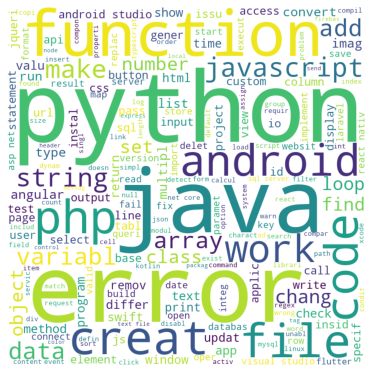

('sql', 'server') 350
('react', 'nativ') 363
('syntax', 'error') 205
('android', 'studio') 595
('visual', 'studio') 421
('asp', 'net') 353
('text', 'file') 223
('net', 'core') 307


In [ ]:
hq_title = processer(2, True)

In [ ]:
#Get Most Common Words of HQ Tags
Counter(" ".join(hq_title["preprocess"]).split()).most_common(10)

[('error', 1096),
 ('file', 987),
 ('react', 962),
 ('android', 929),
 ('angular', 893),
 ('type', 681),
 ('python', 665),
 ('app', 647),
 ('function', 625),
 ('run', 545)]

### Low Quality Edit Titles 

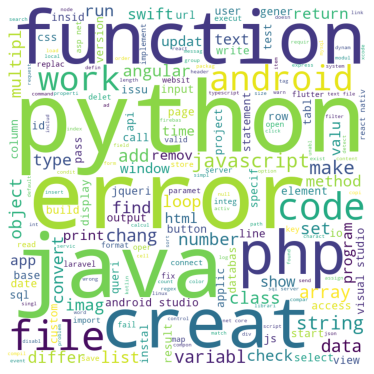

('sql', 'server') 350
('react', 'nativ') 363
('syntax', 'error') 205
('android', 'studio') 595
('visual', 'studio') 421
('asp', 'net') 353
('text', 'file') 223
('net', 'core') 307


In [ ]:
lq_edit_title = processer(1, True)

In [ ]:
#Get Most Common Words of LQ Edit Titles
Counter(" ".join(lq_edit_title["preprocess"]).split()).most_common(10)

[('python', 1338),
 ('error', 1237),
 ('array', 1224),
 ('code', 1218),
 ('string', 1172),
 ('file', 1132),
 ('android', 1105),
 ('sql', 1016),
 ('java', 970),
 ('data', 947)]

### Low Quality Closed Titles

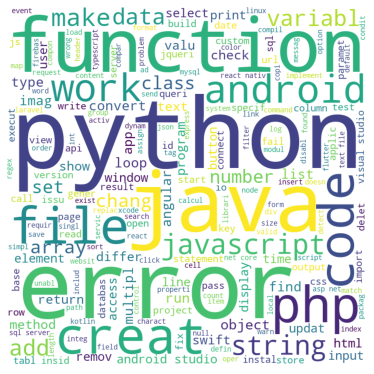

('sql', 'server') 350
('react', 'nativ') 363
('syntax', 'error') 205
('android', 'studio') 595
('visual', 'studio') 421
('asp', 'net') 353
('text', 'file') 223
('net', 'core') 307


In [ ]:
lq_close_title = processer(0, True)

In [ ]:
#Get Most Common Words of lq_close_title
Counter(" ".join(lq_close_title["preprocess"]).split()).most_common(10)

[('string', 1582),
 ('python', 1406),
 ('array', 1393),
 ('java', 1276),
 ('php', 1166),
 ('file', 1140),
 ('function', 1038),
 ('error', 1004),
 ('javascript', 959),
 ('code', 900)]

## Quality By Body

### Quality By Body Including Clarifications of Problem

At this point we have realized that the LQ_EDIT portion of the database has been formated as a string rather than as HTML, as descirbed in the database description. Because of this, we cannot find relationships between the format of a question and its quality, which we feel is an import factor, if we continue including LQ_EDIT posts. So the following portion of the code will remove LQ_EDIT to show the relationship between Body format and its quality.

In [ ]:
# Removes LQ_EDIT rows from Database
data_wo_LQ_EDIT = data[data.Y != 'LQ_EDIT']

#### Body Has Code

In [ ]:
# Checks to see if the Body of the question has code imbeded into it.
# This is done by checking to see if there is a <code> tag in the HTML
body_has_code = pd.DataFrame() 
body_has_code['Code'] = data_wo_LQ_EDIT['Body'].apply(lambda x: int('<code>' in x))
body_has_code['Quality'] = data_wo_LQ_EDIT['Y']

In [ ]:
# Creates Pivot Table separating the Data into groups based on Quality and if
# it contains code
body_has_code = body_has_code.set_index('Code')
body_has_code_pivot = pd.pivot_table(body_has_code, index=['Code'], columns=['Quality'], aggfunc=np.size, fill_value=0)
body_has_code_pivot.head()

Quality,HQ,LQ_CLOSE
Code,,
0,4837,8112
1,15163,11887


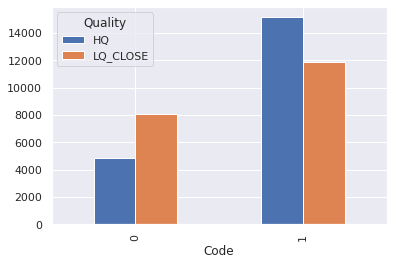

In [ ]:
# Graphs pivot table
body_has_code_pivot.plot(kind= 'bar')
plt.show()

As you can see from the graph, question bodies that contain code are more likely to be HQ than LQ_CLOSE, and vice versa.

#### Body Has Image

In [ ]:
# Checks to see if the Body of the question has an image imbeded into it.
# This is done by checking to see if there is a <img> tag in the HTML
body_has_img = pd.DataFrame() 
body_has_img['Img'] = data_wo_LQ_EDIT['Body'].apply(lambda x: int('<img' in x))
body_has_img['Quality'] = data_wo_LQ_EDIT['Y']

In [ ]:
# Creates Pivot Table separating the Data into groups based on Quality and if
# it contains an Img
body_has_img = body_has_img.set_index('Img')
body_has_img_pivot = pd.pivot_table(body_has_img, index=['Img'], columns=['Quality'], aggfunc=np.size, fill_value=0)
body_has_img_pivot.head()

Quality,HQ,LQ_CLOSE
Img,,
0,18300,19298
1,1700,701


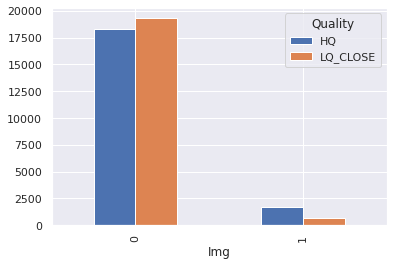

In [ ]:
# Graphs pivot table
body_has_img_pivot.plot(kind= 'bar')
plt.show()

As you can see from the graph, although there are substantially less occurcances of images in the body of a question, question bodies that contain an image are more likely to be HQ than LQ_CLOSE, and vice versa.

#### Body Has Url

In [ ]:
# Checks to see if the Body of the question has an image imbeded into it.
# This is done by checking to see if there is a <a> tag in the HTML
body_has_url = pd.DataFrame() 
body_has_url['Url'] = data_wo_LQ_EDIT['Body'].apply(lambda x: int('<a href' in x))
body_has_url['Quality'] = data_wo_LQ_EDIT['Y']

In [ ]:
# Creates Pivot Table separating the Data into groups based on Quality and if
# it contains a Url
body_has_url = body_has_url.set_index('Url')
body_has_url_pivot = pd.pivot_table(body_has_url, index=['Url'], columns=['Quality'], aggfunc=np.size, fill_value=0)
body_has_url_pivot.head()

Quality,HQ,LQ_CLOSE
Url,,
0,14102,17522
1,5898,2477


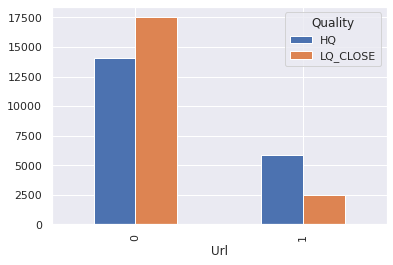

In [ ]:
# Graphs pivot table
body_has_url_pivot.plot(kind= 'bar')
plt.show()

Once again it is clear that there is a relationship between the Body containing a Url and being a HQ question.

These past three graphs show that overall, there is a strong correlation between being a HQ question and the question's body providing some way of clarifying the question whether it be an image of the problem, source code, or a link to help explain the problem.

### Quality By Body Format

Now we are going to try to find relationships due to the format of the body including, if there are lists, how many paragraphs the body has, the amount of unique words, etc.

#### Body Has Lists

In [ ]:
# Checks to see if the Body of the question has an image imbeded into it.
# This is done by checking to see if there is a <ul>,<ol>,<li>,<dl>, <dt>, or 
# <dd> tag in the HTML
body_has_list = pd.DataFrame() 
body_has_list['List'] = data_wo_LQ_EDIT['Body'].apply(lambda x: int('<ul>' in x or '<ol>' in x or '<li>' in x or '<dl>' in x or '<dt>' in x or '<dd>' in x))
body_has_list['Quality'] = data_wo_LQ_EDIT['Y']

In [ ]:
# Creates Pivot Table separating the Data into groups based on Quality and if
# it contains a a form of a List
body_has_list = body_has_list.set_index('List')
body_has_list_pivot = pd.pivot_table(body_has_list, index=['List'], columns=['Quality'], aggfunc=np.size, fill_value=0)
body_has_list_pivot.head()

Quality,HQ,LQ_CLOSE
List,,
0,18532,19559
1,1468,440


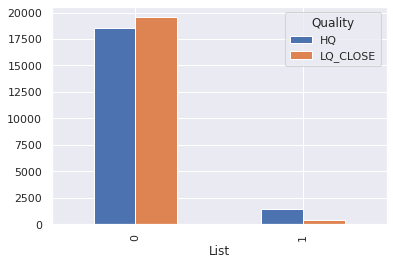

In [ ]:
# Graphs pivot table
body_has_list_pivot.plot(kind= 'bar')
plt.show()

As we can see, including lists can help increase redability of the question and therefore increase the chance of it being a HQ question

#### Number of Paragraphs

In [ ]:
# Counts the number of paragraphs a question has
# This is done by counting the number of <p> tags a question body has
body_paragraph_count = pd.DataFrame() 
body_paragraph_count['Count'] = data_wo_LQ_EDIT['Body'].apply(lambda x: x.count('<p>'))
body_paragraph_count['Quality'] = data_wo_LQ_EDIT['Y']

In [ ]:
# Creates Pivot Table separating the Data into groups based on Quality and the
# number of paragraphs the body has
body_paragraph_count = body_paragraph_count.set_index('Count')
body_paragraph_count_pivot = pd.pivot_table(body_paragraph_count, index=['Count'], columns=['Quality'], aggfunc=np.size, fill_value=0)
body_paragraph_count_pivot.head()

Quality,HQ,LQ_CLOSE
Count,,
0,7,13
1,2343,6292
2,3472,4651
3,3934,3646
4,3336,2324


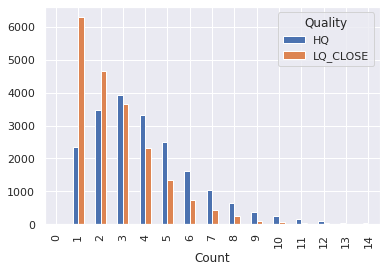

In [ ]:
# Graphs pivot table
body_paragraph_count_pivot.head(15).plot(kind= 'bar')
plt.show()

According to the graph, short, one to two paragraph questions usually yield a low quality result. It is not until you get to 3 paragraphs are you more likely to have a HQ question, with the odds increasing as you have more paragraphs.

This could be because a question with more paragraphs usually means there is a more detailed description which would help clarify the question and make it a better question.

Also a big factor could also be readability as many people in the 1 paragraph column could be putting all of their information into one, long paragraph rather than cutting it up into more readable, smaller paragraphs.

### More Analysis on the Body Column


Plotting the WordCloud,getting the most common words quality wise and the N gram pairs and analysing the average word length  the body with respect to quality

In [ ]:
#create dataset of title and quality
quality_by_body = data[['Body','Y']]
quality_by_body.head()

,Body,Y
0,<p>I'm already familiar with repeating tasks e...,LQ_CLOSE
1,I am having 4 different tables like \r\nselect...,LQ_EDIT
2,<p>I'd like to understand why Java 8 Optionals...,HQ
3,<p>I am attempting to overlay a title over an ...,HQ
4,"<p>The question is very simple, but I just cou...",HQ


In [ ]:
#import stopwords
stopwords_path = 'data/stopwords.txt'
stop_words = []
with open(stopwords_path, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  
print(stop_words)

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

In [ ]:
def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [ ]:
quality_by_body['preprocess'] = quality_by_body['Body'].apply(preprocess)
quality_by_body.head()

,Body,Y,preprocess
0,<p>I'm already familiar with repeating tasks e...,LQ_CLOSE,familiar repeat task second java util timer ja...
1,I am having 4 different tables like \r\nselect...,LQ_EDIT,tabl select system select set select item sele...
2,<p>I'd like to understand why Java 8 Optionals...,HQ,understand java option design immut thread safeti
3,<p>I am attempting to overlay a title over an ...,HQ,attempt overlay titl imag imag darken lower op...
4,"<p>The question is very simple, but I just cou...",HQ,question simpl find answer doesn pre code retu...


In [ ]:
#Get Most Common Words for the body column
Counter(" ".join(quality_by_body["preprocess"]).split()).most_common(10)

[('code', 184217),
 ('gt', 87099),
 ('lt', 83297),
 ('pre', 82747),
 ('class', 33813),
 ('http', 33482),
 ('string', 32477),
 ('android', 29856),
 ('id', 29802),
 ('int', 28852)]

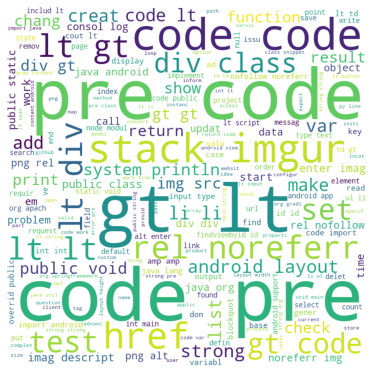

In [ ]:
#Word Cloud
all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in quality_by_body["preprocess"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
#showing word pairs and their occurances (N Gram)
n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))

n_gram
for i in n_gram_dic:
    if n_gram_dic[i] >= 200:
        print(i, n_gram_dic[i])

('java', 'util') 1567
('code', 'show') 278
('item', 'item') 501
('imag', 'imag') 354
('href', 'http') 12865
('http', 'stack') 9821
('stack', 'imgur') 9822
('png', 'rel') 3113
('rel', 'noreferr') 7803
('noreferr', 'img') 2952
('img', 'src') 3786
('src', 'http') 3835
('png', 'alt') 2759
('alt', 'enter') 2167
('enter', 'imag') 3551
('imag', 'descript') 3567
('compon', 'pre') 236
('pre', 'code') 41852
('code', 'compon') 257
('react', 'nativ') 1242
('modul', 'export') 235
('function', 'return') 671
('return', 'lt') 551
('gt', 'lt') 37486
('lt', 'view') 207
('lt', 'text') 263
('text', 'gt') 420
('select', 'gt') 258
('color', 'white') 439
('height', 'width') 239
('posit', 'absolut') 271
('code', 'pre') 45963
('pre', 'question') 293
('code', 'return') 733
('return', 'code') 1467
('pre', 'compil') 201
('code', 'code') 11824
('option', 'code') 211
('code', 'string') 680
('code', 'includ') 1216
('includ', 'lt') 1930
('lt', 'stdio') 332
('stdio', 'gt') 332
('gt', 'includ') 1002
('int', 'int') 2361

In [ ]:
quality_by_body = quality_by_body[['Body', 'preprocess','Y']].copy()
quality_by_body['Y'] = quality_by_body['Y'].map({'LQ_CLOSE':0, 'LQ_EDIT': 1, 'HQ':2})
quality_by_body.head()

,Body,preprocess,Y
0,<p>I'm already familiar with repeating tasks e...,familiar repeat task second java util timer ja...,0
1,I am having 4 different tables like \r\nselect...,tabl select system select set select item sele...,1
2,<p>I'd like to understand why Java 8 Optionals...,understand java option design immut thread safeti,2
3,<p>I am attempting to overlay a title over an ...,attempt overlay titl imag imag darken lower op...,2
4,"<p>The question is very simple, but I just cou...",question simpl find answer doesn pre code retu...,2


In [ ]:
def processer(score, wordmap):
  new_data = quality_by_body.loc[quality_by_body['Y'] == score]
  new_data.head()
  #Get Most Common Words
  Counter(" ".join(new_data["preprocess"]).split()).most_common(10)
   
  #Create word cloud (pretty but not necessary)
  all_words = '' 

  #looping through all incidents and joining them to one text, to extract most common words
  for arg in quality_by_body["preprocess"]: 
    tokens = arg.split()  
    all_words += " ".join(tokens)+" "
    
  wordcloud = WordCloud(width = 700, height = 700, 
              background_color ='white', 
              min_font_size = 10).generate(all_words) 
  
    # plot the WordCloud image  
  if wordmap == True:                      
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    
  #showing word pairs and their occurances
  n_gram = 2
  n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))
  for i in n_gram_dic:
    if n_gram_dic[i] >= 200:
        print(i, n_gram_dic[i])
  
  return new_data

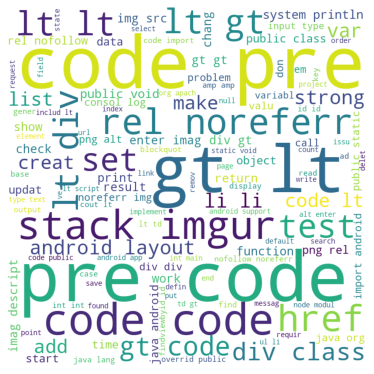

('java', 'util') 1567
('code', 'show') 278
('item', 'item') 501
('imag', 'imag') 354
('href', 'http') 12865
('http', 'stack') 9821
('stack', 'imgur') 9822
('png', 'rel') 3113
('rel', 'noreferr') 7803
('noreferr', 'img') 2952
('img', 'src') 3786
('src', 'http') 3835
('png', 'alt') 2759
('alt', 'enter') 2167
('enter', 'imag') 3551
('imag', 'descript') 3567
('compon', 'pre') 236
('pre', 'code') 41852
('code', 'compon') 257
('react', 'nativ') 1242
('modul', 'export') 235
('function', 'return') 671
('return', 'lt') 551
('gt', 'lt') 37486
('lt', 'view') 207
('lt', 'text') 263
('text', 'gt') 420
('select', 'gt') 258
('color', 'white') 439
('height', 'width') 239
('posit', 'absolut') 271
('code', 'pre') 45963
('pre', 'question') 293
('code', 'return') 733
('return', 'code') 1467
('pre', 'compil') 201
('code', 'code') 11824
('option', 'code') 211
('code', 'string') 680
('code', 'includ') 1216
('includ', 'lt') 1930
('lt', 'stdio') 332
('stdio', 'gt') 332
('gt', 'includ') 1002
('int', 'int') 2361

In [ ]:
# Plotting the Word Cloud and getting the occurences for the N gram word pairs
hq_body = processer(2, True)

In [ ]:
#Getting the top ten common words for HQ body
Counter(" ".join(hq_body["preprocess"]).split()).most_common(10)

[('code', 113917),
 ('pre', 48340),
 ('gt', 43866),
 ('lt', 35942),
 ('http', 18771),
 ('error', 12851),
 ('android', 11899),
 ('file', 11511),
 ('app', 11322),
 ('li', 11204)]

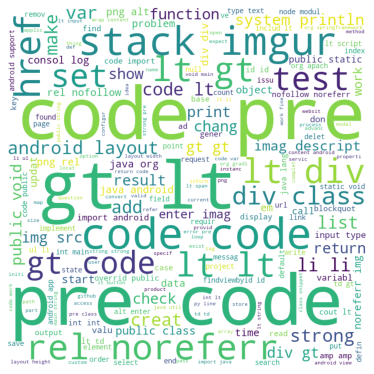

('java', 'util') 1567
('code', 'show') 278
('item', 'item') 501
('imag', 'imag') 354
('href', 'http') 12865
('http', 'stack') 9821
('stack', 'imgur') 9822
('png', 'rel') 3113
('rel', 'noreferr') 7803
('noreferr', 'img') 2952
('img', 'src') 3786
('src', 'http') 3835
('png', 'alt') 2759
('alt', 'enter') 2167
('enter', 'imag') 3551
('imag', 'descript') 3567
('compon', 'pre') 236
('pre', 'code') 41852
('code', 'compon') 257
('react', 'nativ') 1242
('modul', 'export') 235
('function', 'return') 671
('return', 'lt') 551
('gt', 'lt') 37486
('lt', 'view') 207
('lt', 'text') 263
('text', 'gt') 420
('select', 'gt') 258
('color', 'white') 439
('height', 'width') 239
('posit', 'absolut') 271
('code', 'pre') 45963
('pre', 'question') 293
('code', 'return') 733
('return', 'code') 1467
('pre', 'compil') 201
('code', 'code') 11824
('option', 'code') 211
('code', 'string') 680
('code', 'includ') 1216
('includ', 'lt') 1930
('lt', 'stdio') 332
('stdio', 'gt') 332
('gt', 'includ') 1002
('int', 'int') 2361

In [ ]:
#Plotting Word Cloud for LQ edit body and getting all the N gram word pairs with their occurences
lq_edit_body = processer(1, True)

In [ ]:
#Getting top 10 words for LQ edit body
Counter(" ".join(lq_edit_body["preprocess"]).split()).most_common(10)

[('id', 15749),
 ('string', 14047),
 ('int', 13514),
 ('class', 13105),
 ('code', 11637),
 ('android', 11618),
 ('data', 9127),
 ('public', 8938),
 ('file', 8895),
 ('return', 8334)]

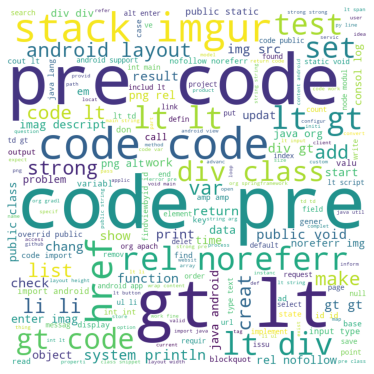

('java', 'util') 1567
('code', 'show') 278
('item', 'item') 501
('imag', 'imag') 354
('href', 'http') 12865
('http', 'stack') 9821
('stack', 'imgur') 9822
('png', 'rel') 3113
('rel', 'noreferr') 7803
('noreferr', 'img') 2952
('img', 'src') 3786
('src', 'http') 3835
('png', 'alt') 2759
('alt', 'enter') 2167
('enter', 'imag') 3551
('imag', 'descript') 3567
('compon', 'pre') 236
('pre', 'code') 41852
('code', 'compon') 257
('react', 'nativ') 1242
('modul', 'export') 235
('function', 'return') 671
('return', 'lt') 551
('gt', 'lt') 37486
('lt', 'view') 207
('lt', 'text') 263
('text', 'gt') 420
('select', 'gt') 258
('color', 'white') 439
('height', 'width') 239
('posit', 'absolut') 271
('code', 'pre') 45963
('pre', 'question') 293
('code', 'return') 733
('return', 'code') 1467
('pre', 'compil') 201
('code', 'code') 11824
('option', 'code') 211
('code', 'string') 680
('code', 'includ') 1216
('includ', 'lt') 1930
('lt', 'stdio') 332
('stdio', 'gt') 332
('gt', 'includ') 1002
('int', 'int') 2361

In [ ]:
#Word Cloud for LQ close body and getting all the N gram word pairs with their occurences
lq_close_body = processer(0, True)